In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
radius = 8
global_epsilon = 0.000000001
center = (global_epsilon, global_epsilon)
arr_shape = 100
step = radius / arr_shape

In [6]:
def difference_function(x, y):
    return np.sin(x) * np.exp((1 - np.cos(y)) ** 2) + \
           np.cos(y) * np.exp((1 - np.sin(x)) ** 2) + (x - y) ** 2
           
def rotate_vector(length, a):
    return length * np.cos(a), length * np.sin(a)

def derivative_y(epsilon, arg):
    return (difference_function(arg, epsilon + global_epsilon) - 
            difference_function(arg, epsilon)) / global_epsilon
    
def derivative_x(epsilon, arg):
    return (difference_function(global_epsilon + epsilon, arg) - 
            difference_function(epsilon, arg)) / global_epsilon

In [7]:
def calculate_flip_points():
    flip_points = np.array([0, 0])
    points = np.zeros((360, arr_shape), dtype=bool)
    cx, cy = center
    
    for i in range(arr_shape):
        for alpha in range(360):
            x, y =rotate_vector(step, alpha)
            x = x * i + cx 
            y = y * i + cy
            points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0
            if not points[alpha][i - 1] and points[alpha][i]:
                flip_points = np.vstack((flip_points, np.array([alpha, i - 1])))
                
    return flip_points

def pick_estimates(positions):
    vx, vy = rotate_vector(step, positions[1][0])
    cx, cy = center
    best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]
    
    for index in range(2, len(positions)):
        vx, vy = rotate_vector(step, positions[index][0])
        x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]
        if difference_function(best_x, best_y) > difference_function(x, y):
            best_x = x
            bset_y = y
            
    for index in range(360):
        vx, vy = rotate_vector(step, index)
        x, y = cx + vx * (arr_shape - 1), cy + vy * (arr_shape - 1)
        if difference_function(best_x, best_y) > difference_function(x, y):
            best_x = x
            best_y = y
            
    return best_x, best_y

In [8]:
def gradient_descent(best_estimates, is_x):
    derivative = derivative_x if is_x else derivative_y
    best_x, best_y = best_estimates
    descent_step = step
    value = derivative(best_y, best_x)
    
    while abs(value) > global_epsilon:
        descent_step *= 0.95
        best_y = best_y - descent_step \
            if derivative(best_y, best_x) > 0 else best_y + descent_step
        value = derivative(best_y, best_x)
        
    return best_y, best_x

def find_minimum():
    return gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)

In [9]:
def get_grid(grid_step):
    samples = np.arange(-radius, radius, grid_step)
    x, y = np.meshgrid(samples, samples)
    
    return x, y, difference_function(x, y)

def draw_chart(point, grid):
    point_x, point_y, point_z = point
    grid_x, grid_y, grid_z = grid
    
    plt.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4 })
    
    ax = plt.figure().add_subplot(111, projection='3d')
    ax.scatter(point_x, point_y, point_z, color='red')
    ax.plot_surface(grid_x, grid_y, grid_z, rstride=5, cstride=5, alpha=0.7)
    
    plt.show()

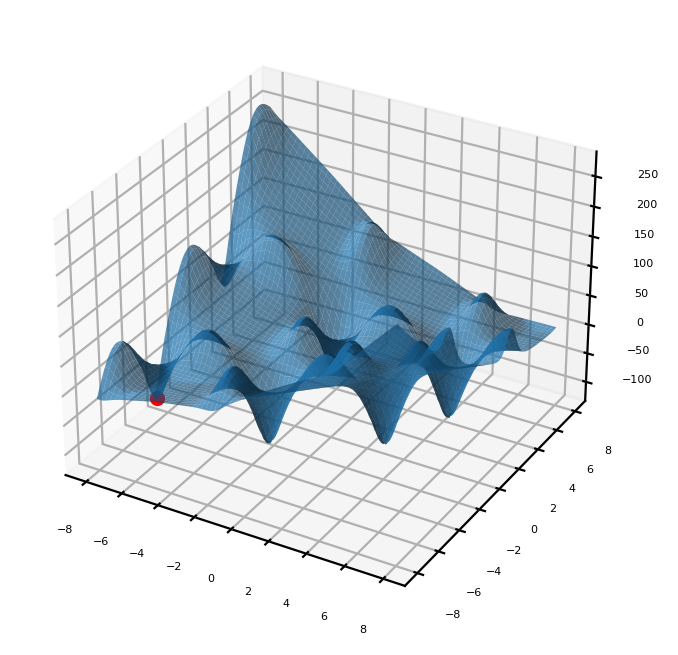

In [11]:
min_x, min_y = find_minimum()
minimum = (min_x, min_y, difference_function(min_x, min_y))

draw_chart(minimum, get_grid(0.05))